In [1]:
#imports 
import tensorflow as tf
import numpy as np
import Set_Gaussian_Data as data
import matplotlib.pyplot as plt

In [2]:
#initialize arrays for storing training/testing info and unit numbers (for graph)
num_x_vals = np.array([4,8,16,32,64,128,256,512])
training_vals = np.zeros(len(num_x_vals))
testing_vals = np.zeros(len(num_x_vals))

In [3]:
#iterate through and store training and testing histories in training and testing arrays based on different parameters
#This structure allows training AND model to change after each dataset is trained  
#here are the parameters: 
val = 4
index = 0
num_hidden_units = 4
while (index < 8):
    print(val) 
    #load input data for gaussian
    training = data.create_training_set(1000, val) #outputs an array of x_vals, mean values, and sigma values respectively
    x_train = training[0] 
    y_train = training[1]  
    z_train = training[2] 
    y_train = np.vstack((y_train, z_train)) #compile training mean and standard deviation into single data structure
    y_train = y_train.T #first column as mean, second column as sd

    testing = data.create_training_set(300, val)
    x_test = testing[0] 
    y_test = testing[1] 
    z_test = testing[2] 
    y_test = np.vstack((y_test, z_test)) #compile test mean and standard deviation into single data structure 
    y_test = y_test.T


    #set layers
    model = tf.keras.models.Sequential() #feed forward
    #input layer: 21 different x values to represent the gaussian function
    model.add(tf.keras.layers.Input(val,)) 
    #hidden layers (2): 
    model.add(tf.keras.layers.Dense(125, activation = tf.nn.relu))
    model.add(tf.keras.layers.Dense(125, activation = tf.nn.relu))
    model.add(tf.keras.layers.Dense(125, activation = tf.nn.relu))
    #model.add(tf.keras.layers.Dense(125, activation = tf.nn.relu))
    #model.add(tf.keras.layers.Dense(125, activation = tf.nn.relu))
    #output layer:
    model.add(tf.keras.layers.Dense(2,))


    #optimize
    model.compile(optimizer = 'adam', 
              loss = 'mean_squared_error',
              metrics = ['accuracy']) 
    history = model.fit(x_train, y_train, epochs = 90) #90 epochs minimizes the difference between test and training and testing cost
    loss_arr = history.history['loss'] 
    loss_val = loss_arr[len(loss_arr)-1]
    print("Loss: " + str(loss_val))
    training_vals[index] = loss_val

    #evaluate the test set and find test loss and accuracy
    results = model.evaluate(x = x_test, y = y_test)
    val_loss = results[0] #loss between model and actual
    val_acc = results[1] #accuracy of the model based on actual
    testing_vals[index] = results[0] 
    print(val_loss, val_acc)

    print(training_vals)
    print(testing_vals)
    index += 1
    val *= 2
    num_hidden_units = val *2 

    

4
Train on 1000 samples
Epoch 1/90
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.0063 - accuracy: 0.7590
Epoch 2/90
1000/1000 [==============================] - 0s 111us/sample - loss: 0.0036 - accuracy: 0.8050
Epoch 3/90
1000/1000 [==============================] - 0s 114us/sample - loss: 0.0031 - accuracy: 0.7960
Epoch 4/90
1000/1000 [==============================] - 0s 121us/sample - loss: 0.0029 - accuracy: 0.8280
Epoch 5/90
1000/1000 [==============================] - 0s 123us/sample - loss: 0.0030 - accuracy: 0.8060
Epoch 6/90
1000/1000 [==============================] - 0s 131us/sample - loss: 0.0029 - accuracy: 0.8020
Epoch 7/90
1000/1000 [==============================] - 0s 141us/sample - loss: 0.0027 - accuracy: 0.8250
Epoch 8/90
1000/1000 [==============================] - 0s 130us/sample - loss: 0.0026 - accuracy: 0.8400
Epoch 9/90
1000/1000 [==============================] - 0s 125us/sample - loss: 0.0026 - accuracy: 0.8350
Epoch 10/90
1000/1000 [=

0.0020934541973595816 0.8566667
[0.00199917 0.         0.         0.         0.         0.
 0.         0.        ]
[0.00209345 0.         0.         0.         0.         0.
 0.         0.        ]
8
Train on 1000 samples
Epoch 1/90
1000/1000 [==============================] - 1s 866us/sample - loss: 0.0321 - accuracy: 0.7970
Epoch 2/90
1000/1000 [==============================] - 0s 106us/sample - loss: 0.0148 - accuracy: 0.7670
Epoch 3/90
1000/1000 [==============================] - 0s 103us/sample - loss: 0.0065 - accuracy: 0.8230
Epoch 4/90
1000/1000 [==============================] - 0s 104us/sample - loss: 0.0430 - accuracy: 0.7780
Epoch 5/90
1000/1000 [==============================] - 0s 104us/sample - loss: 0.0059 - accuracy: 0.8610
Epoch 6/90
1000/1000 [==============================] - 0s 103us/sample - loss: 0.0091 - accuracy: 0.8190
Epoch 7/90
1000/1000 [==============================] - 0s 105us/sample - loss: 0.0029 - accuracy: 0.8710
Epoch 8/90
1000/1000 [==============

0.0014127042889595031 0.93666667
[0.00199917 0.00104314 0.         0.         0.         0.
 0.         0.        ]
[0.00209345 0.0014127  0.         0.         0.         0.
 0.         0.        ]
16
Train on 1000 samples
Epoch 1/90
1000/1000 [==============================] - 1s 933us/sample - loss: 0.0307 - accuracy: 0.7170
Epoch 2/90
1000/1000 [==============================] - 0s 114us/sample - loss: 0.0087 - accuracy: 0.8710
Epoch 3/90
1000/1000 [==============================] - 0s 114us/sample - loss: 0.0046 - accuracy: 0.8860
Epoch 4/90
1000/1000 [==============================] - 0s 115us/sample - loss: 0.0045 - accuracy: 0.8600
Epoch 5/90
1000/1000 [==============================] - 0s 113us/sample - loss: 0.0028 - accuracy: 0.8970
Epoch 6/90
1000/1000 [==============================] - 0s 113us/sample - loss: 0.0013 - accuracy: 0.9360
Epoch 7/90
1000/1000 [==============================] - 0s 114us/sample - loss: 0.0013 - accuracy: 0.9310
Epoch 8/90
1000/1000 [============

0.004450584308845767 0.9633333
[0.00199917 0.00104314 0.00035487 0.         0.         0.
 0.         0.        ]
[0.00209345 0.0014127  0.00445058 0.         0.         0.
 0.         0.        ]
32
Train on 1000 samples
Epoch 1/90
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.0623 - accuracy: 0.7280
Epoch 2/90
1000/1000 [==============================] - 0s 106us/sample - loss: 0.0172 - accuracy: 0.8510
Epoch 3/90
1000/1000 [==============================] - 0s 108us/sample - loss: 0.0167 - accuracy: 0.8240
Epoch 4/90
1000/1000 [==============================] - 0s 109us/sample - loss: 0.0113 - accuracy: 0.8500
Epoch 5/90
1000/1000 [==============================] - 0s 133us/sample - loss: 0.0063 - accuracy: 0.9060
Epoch 6/90
1000/1000 [==============================] - 0s 129us/sample - loss: 0.0058 - accuracy: 0.9120
Epoch 7/90
1000/1000 [==============================] - 0s 113us/sample - loss: 0.0039 - accuracy: 0.8990
Epoch 8/90
1000/1000 [================

Epoch 74/90
1000/1000 [==============================] - 0s 118us/sample - loss: 3.4533e-04 - accuracy: 0.9780
Epoch 75/90
1000/1000 [==============================] - 0s 116us/sample - loss: 4.5652e-04 - accuracy: 0.9740
Epoch 76/90
1000/1000 [==============================] - 0s 146us/sample - loss: 4.3967e-04 - accuracy: 0.9760
Epoch 77/90
1000/1000 [==============================] - 0s 127us/sample - loss: 4.6688e-04 - accuracy: 0.9700
Epoch 78/90
1000/1000 [==============================] - 0s 132us/sample - loss: 4.6789e-04 - accuracy: 0.9740
Epoch 79/90
1000/1000 [==============================] - 0s 119us/sample - loss: 5.4210e-04 - accuracy: 0.9760
Epoch 80/90
1000/1000 [==============================] - 0s 113us/sample - loss: 9.3578e-04 - accuracy: 0.9650
Epoch 81/90
1000/1000 [==============================] - 0s 131us/sample - loss: 9.3054e-04 - accuracy: 0.9530
Epoch 82/90
1000/1000 [==============================] - 0s 128us/sample - loss: 4.7317e-04 - accuracy: 0.9740
E

0.0005388570524519309 0.9766667
[0.00199917 0.00104314 0.00035487 0.0004439  0.         0.
 0.         0.        ]
[0.00209345 0.0014127  0.00445058 0.00053886 0.         0.
 0.         0.        ]
64
Train on 1000 samples
Epoch 1/90
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.1732 - accuracy: 0.7210
Epoch 2/90
1000/1000 [==============================] - 0s 132us/sample - loss: 1.9766 - accuracy: 0.6680
Epoch 3/90
1000/1000 [==============================] - 0s 138us/sample - loss: 0.8193 - accuracy: 0.6940
Epoch 4/90
1000/1000 [==============================] - 0s 134us/sample - loss: 0.0978 - accuracy: 0.7210
Epoch 5/90
1000/1000 [==============================] - 0s 135us/sample - loss: 0.0729 - accuracy: 0.7440
Epoch 6/90
1000/1000 [==============================] - 0s 134us/sample - loss: 0.1596 - accuracy: 0.8290
Epoch 7/90
1000/1000 [==============================] - 0s 126us/sample - loss: 0.2811 - accuracy: 0.8910
Epoch 8/90
1000/1000 [===============

0.0010722416592761875 0.9766667
[0.00199917 0.00104314 0.00035487 0.0004439  0.00020151 0.
 0.         0.        ]
[0.00209345 0.0014127  0.00445058 0.00053886 0.00107224 0.
 0.         0.        ]
128
Train on 1000 samples
Epoch 1/90
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.1443 - accuracy: 0.7250
Epoch 2/90
1000/1000 [==============================] - 0s 140us/sample - loss: 0.0852 - accuracy: 0.8290
Epoch 3/90
1000/1000 [==============================] - 0s 121us/sample - loss: 0.0792 - accuracy: 0.7920
Epoch 4/90
1000/1000 [==============================] - 0s 121us/sample - loss: 0.0457 - accuracy: 0.7690
Epoch 5/90
1000/1000 [==============================] - 0s 122us/sample - loss: 0.0166 - accuracy: 0.8540
Epoch 6/90
1000/1000 [==============================] - 0s 125us/sample - loss: 0.0093 - accuracy: 0.8850
Epoch 7/90
1000/1000 [==============================] - 0s 125us/sample - loss: 0.0086 - accuracy: 0.8890
Epoch 8/90
1000/1000 [==============

Epoch 74/90
1000/1000 [==============================] - 0s 168us/sample - loss: 1.8914e-04 - accuracy: 0.9780
Epoch 75/90
1000/1000 [==============================] - 0s 182us/sample - loss: 2.1437e-04 - accuracy: 0.9880
Epoch 76/90
1000/1000 [==============================] - 0s 158us/sample - loss: 2.3738e-04 - accuracy: 0.9780
Epoch 77/90
1000/1000 [==============================] - 0s 163us/sample - loss: 2.2260e-04 - accuracy: 0.9810
Epoch 78/90
1000/1000 [==============================] - 0s 188us/sample - loss: 2.4271e-04 - accuracy: 0.9850
Epoch 79/90
1000/1000 [==============================] - 0s 160us/sample - loss: 3.4074e-04 - accuracy: 0.9750
Epoch 80/90
1000/1000 [==============================] - 0s 153us/sample - loss: 8.0334e-04 - accuracy: 0.9720
Epoch 81/90
1000/1000 [==============================] - 0s 154us/sample - loss: 5.2908e-04 - accuracy: 0.9760
Epoch 82/90
1000/1000 [==============================] - 0s 165us/sample - loss: 7.8645e-04 - accuracy: 0.9690
E

0.001730630894890055 0.95
[0.00199917 0.00104314 0.00035487 0.0004439  0.00020151 0.00019614
 0.         0.        ]
[0.00209345 0.0014127  0.00445058 0.00053886 0.00107224 0.00173063
 0.         0.        ]
256
Train on 1000 samples
Epoch 1/90
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.2698 - accuracy: 0.7090
Epoch 2/90
1000/1000 [==============================] - 0s 144us/sample - loss: 0.7285 - accuracy: 0.8190
Epoch 3/90
1000/1000 [==============================] - 0s 146us/sample - loss: 0.2536 - accuracy: 0.7930
Epoch 4/90
1000/1000 [==============================] - 0s 136us/sample - loss: 0.3568 - accuracy: 0.7670
Epoch 5/90
1000/1000 [==============================] - 0s 134us/sample - loss: 0.2776 - accuracy: 0.7650
Epoch 6/90
1000/1000 [==============================] - 0s 133us/sample - loss: 0.0505 - accuracy: 0.8470
Epoch 7/90
1000/1000 [==============================] - 0s 143us/sample - loss: 0.0080 - accuracy: 0.9320
Epoch 8/90
1000/1000 [====

0.0545188747998327 0.96666664
[1.99916649e-03 1.04314440e-03 3.54870520e-04 4.43899101e-04
 2.01509772e-04 1.96136948e-04 8.92184419e-05 0.00000000e+00]
[0.00209345 0.0014127  0.00445058 0.00053886 0.00107224 0.00173063
 0.05451887 0.        ]
512
Train on 1000 samples
Epoch 1/90
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.3670 - accuracy: 0.6830
Epoch 2/90
1000/1000 [==============================] - 0s 217us/sample - loss: 0.5092 - accuracy: 0.7260
Epoch 3/90
1000/1000 [==============================] - 0s 206us/sample - loss: 0.2301 - accuracy: 0.7980
Epoch 4/90
1000/1000 [==============================] - 0s 151us/sample - loss: 0.1229 - accuracy: 0.8170
Epoch 5/90
1000/1000 [==============================] - 0s 190us/sample - loss: 0.0372 - accuracy: 0.8700
Epoch 6/90
1000/1000 [==============================] - 0s 182us/sample - loss: 0.0192 - accuracy: 0.8790
Epoch 7/90
1000/1000 [==============================] - 0s 190us/sample - loss: 0.0093 - accurac

0.05129140261560679 0.95666665
[1.99916649e-03 1.04314440e-03 3.54870520e-04 4.43899101e-04
 2.01509772e-04 1.96136948e-04 8.92184419e-05 9.86837322e-04]
[0.00209345 0.0014127  0.00445058 0.00053886 0.00107224 0.00173063
 0.05451887 0.0512914 ]


In [4]:
print(training_vals)
print(testing_vals)

[1.99916649e-03 1.04314440e-03 3.54870520e-04 4.43899101e-04
 2.01509772e-04 1.96136948e-04 8.92184419e-05 9.86837322e-04]
[0.00209345 0.0014127  0.00445058 0.00053886 0.00107224 0.00173063
 0.05451887 0.0512914 ]


In [ ]:
copy1 = training_vals
copy2 = testing_vals

In [ ]:
predictions = predictions.T
y_test = y_test.T

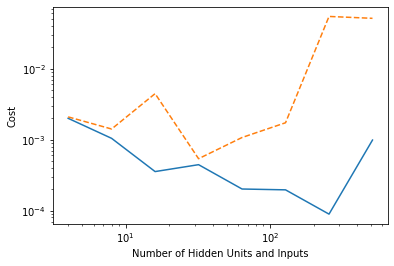

In [5]:
#print training and testing cost against the number of inputs = number of hidden layers
plt.plot(num_x_vals, training_vals, label = "Training", linestyle = '-')
plt.plot(num_x_vals, testing_vals, label = "Testing", linestyle = '--') 
plt.ylabel('Cost')
plt.xlabel('Number of Hidden Units and Inputs')
plt.xscale('log') 
plt.yscale('log') 
plt.show() 

In [40]:
#saves the model data
model.save('mean_and_sd.model')
new_model = tf.keras.models.load_model('mean_and_sd.model')


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: mean_and_sd.model/assets


In [45]:
#makes predictions for all elements in x_test array  
predictions = new_model.predict(x_test) #predicts all means and standard deviations of the x_test dataset
predictions = predictions.T
y_test = y_test.T 

X Input Values: [-0.00000000e+000 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000
 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000
 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000
 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000
 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000
 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000
 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000
 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000
 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000
 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000
 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000
 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000
 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000
 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000
 -0.00000000e+000 

IndexError: index 234 is out of bounds for axis 0 with size 2

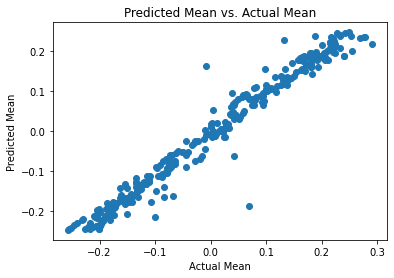

In [46]:
#scatter plot of actual vs. predicted mean
plt.scatter(predictions[0],y_test[0])
plt.title('Predicted Mean vs. Actual Mean')
plt.xlabel('Actual Mean')
plt.ylabel('Predicted Mean')
plt.show() 

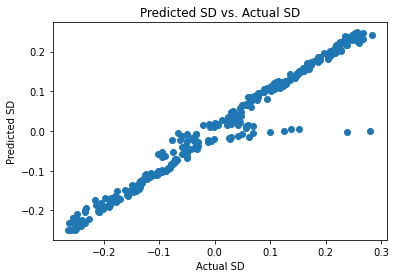

In [47]:
#scatter plot of actual vs. predicted SD
plt.scatter(predictions[1],y_test[1])
plt.title('Predicted SD vs. Actual SD')
plt.xlabel('Actual SD')
plt.ylabel('Predicted SD')
plt.show()

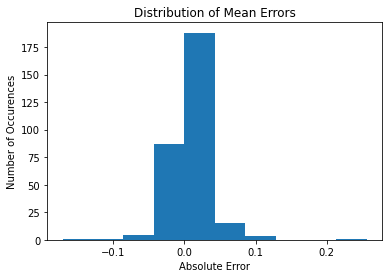

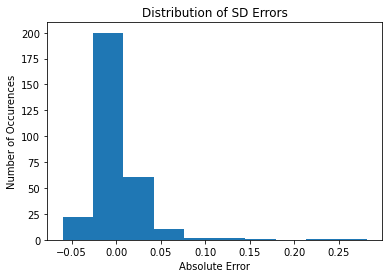

In [50]:
#histogram representing absolute error between actual and predicted values
plt.hist(predictions[0]-y_test[0])
plt.title('Distribution of Mean Errors')
plt.ylabel('Number of Occurences')
plt.xlabel('Absolute Error')
plt.show()
plt.hist(predictions[1]-y_test[1])
plt.title('Distribution of SD Errors')
plt.ylabel('Number of Occurences') 
plt.xlabel('Absolute Error') 
plt.show() 